In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [5]:
input_data = pd.read_csv(r"G:\ml_input\Phishing Data - Phishing Data.csv")
Y = input_data["Result"]
X = input_data.iloc[:,:-1]

In [ ]:
#model_training
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=32)
model = LogisticRegression()
model.fit(x_train,y_train)

In [7]:
#model_testing
y_predit = model.predict(x_test)
recall = recall_score(y_test,y_predit)
accuracy = accuracy_score(y_test,y_predit)
accuracy

0.9512195121951219

In [ ]:
#hyper parameter tuning
params = {"penalty" : ['l1', 'l2', 'elasticnet', None],"random_state":[5,10,,20,43,32,60,70],"C":[1.0,.08,0.7,1.5,2.0,0.3,1.7]}
grid_search = GridSearchCV(LogisticRegression(),params,cv=5)
grid_search.fit(x_train,y_train)

In [24]:
y_predict = grid_search.predict(x_test)
accuracy_score(y_test,y_predict)



0.9512195121951219

In [8]:
#visualisation
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)


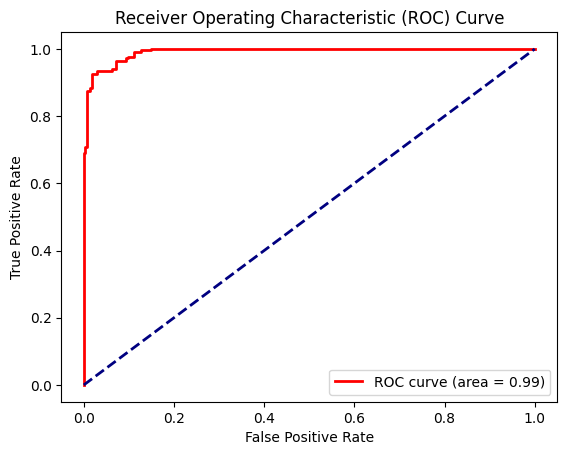

In [16]:
plt.figure()
plt.plot(fpr,tpr,color = "red",lw=2,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()